In [1]:
import scanpy as sc
import pandas as pd
from pathlib import Path
import anndata as ad
import numpy as np
import os

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

DPI = 300
FONTSIZE = 20  # 42

sc.settings.set_figure_params(
    scanpy=True, dpi=100, transparent=True, vector_friendly=True, dpi_save=DPI
)
from matplotlib import rcParams

rcParams["pdf.fonttype"] = 42

In [2]:
DIR2LOAD = Path(
    "/data/BCI-CRC/nasrine/data/CRC/spatial/CRC_LM_VISIUM/CRC_LM_VISIUM_04_08_09_11/cell2location/prepareInputRNA/"
)
DIR2LOAD.mkdir(parents=True, exist_ok=True)

In [3]:
FIG2SAVE = Path("/data/BCI-CRC/nasrine/data/CRC/Metastatic_CRC_LM_dataset/final_object/figures/forpaper/")
FIG2SAVE.mkdir(parents=True, exist_ok=True)

In [4]:
adata_liver = sc.read_h5ad(
    DIR2LOAD.joinpath("Multiome_Che_Wu_CRC_LM_annotations_raw.h5ad")
)

In [5]:
adata_liver.obs.cell_source.value_counts()

Wu-Cells      49302
Che-Cells     43984
BCI-Nuclei    21035
Name: cell_source, dtype: int64

In [6]:
adata_multiome = adata_liver[adata_liver.obs.cell_source=="BCI-Nuclei"].copy()
adata_multiome.shape

(21035, 39559)

In [7]:
# remove mast
adata_multiome = adata_multiome[adata_multiome.obs.Annotation_scVI!="Mast"].copy()
adata_multiome.shape

(21034, 39559)

In [8]:
adata_multiome.obs.Annotation_scVI.cat.categories

Index(['B', 'Endothelial', 'Epithelial', 'Hepatocyte', 'Myeloid', 'Plasma',
       'Stromal', 'T-NK-ILC'],
      dtype='object')

In [9]:
from matplotlib.patches import Rectangle


def proportion_cells_patient(
    adata, groupby_labels, xlabel: str, ylabel: str, colors: dict, figname: str
):  # colors
    # compute proportion of cells within each group
    table2plot = (
        adata.reset_index()
        .groupby(groupby_labels)
        .size()
        .groupby(level=0)
        .apply(lambda x: x * 100 / x.sum())
        .unstack()
    )

    fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        sharey=False,
        sharex=False,
        dpi=DPI,
    )  # figsize=(4, 4))

    print(table2plot)
    table2plot.plot.barh(stacked=True, ax=ax, color=colors.values())  # , color=colors
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.grid(False, which="major", axis="both")  # removes major horizontal gridlinesd

    labels = list(colors.keys())
    l = [Rectangle((0, 0), 0, 0, color=color) for color in list(colors.values())]
    ax.legend(
        l,
        labels,
        loc="upper left",
        bbox_to_anchor=(1, 0.8),
        facecolor="white",
        edgecolor="white",
        ncol=1,
        borderaxespad=0.0,
        framealpha=0,
        frameon=False,
    )

    plt.savefig(FIG2SAVE.joinpath(figname), dpi=DPI, format="pdf", bbox_inches="tight")
    plt.show()

In [10]:
### total we have 15 patients: 
# create color-code for 15 same as last fig:

from collections import OrderedDict

color_dict = OrderedDict(
    zip(
        adata_multiome.obs["Patient"].cat.categories.values.tolist(),
        plt.cm.get_cmap('tab20').colors[:len(adata_multiome.obs["Patient"].cat.categories.values.tolist())],
    )
)


color_dict_subset = {k:v for k,v in color_dict.items() if k in set(adata_multiome.obs.Patient)}
color_dict_subset

{'CRC01': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'CRC02': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 'CRC03': (1.0, 0.4980392156862745, 0.054901960784313725),
 'CRC04': (1.0, 0.7333333333333333, 0.47058823529411764),
 'CRC05': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'CRC06': (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 'CRC07': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'CRC08': (1.0, 0.596078431372549, 0.5882352941176471),
 'CRC09': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'CRC10': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 'CRC11': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'CRC12': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 'CRC13': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'CRC14': (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 'CRC15': (0.4980392156862745, 0

## Global

Patient             CRC01      CRC02     CRC03      CRC04     CRC05  \
Annotation_scVI                                                       
B                0.000000   1.020408  4.081633   0.000000  0.000000   
Endothelial      0.817996  11.451943  3.476483   2.862986  0.613497   
Epithelial       2.136298   4.410019  2.823412  16.728090  4.085202   
Hepatocyte       0.000000   2.974828  9.839817   6.407323  0.000000   
Myeloid          0.601751   2.625821  8.643326   7.986871  1.203501   
Plasma           0.000000   3.125000  0.000000   0.000000  0.000000   
Stromal          0.000000  10.746812  4.918033   2.367942  1.821494   
T-NK-ILC         0.064103   2.564103  3.525641   0.512821  0.641026   

Patient              CRC06     CRC07      CRC08      CRC09      CRC10  \
Annotation_scVI                                                         
B                 4.081633  0.000000   0.000000  61.224490   0.000000   
Endothelial       6.748466  0.000000  15.746421   3.067485   8.588957 

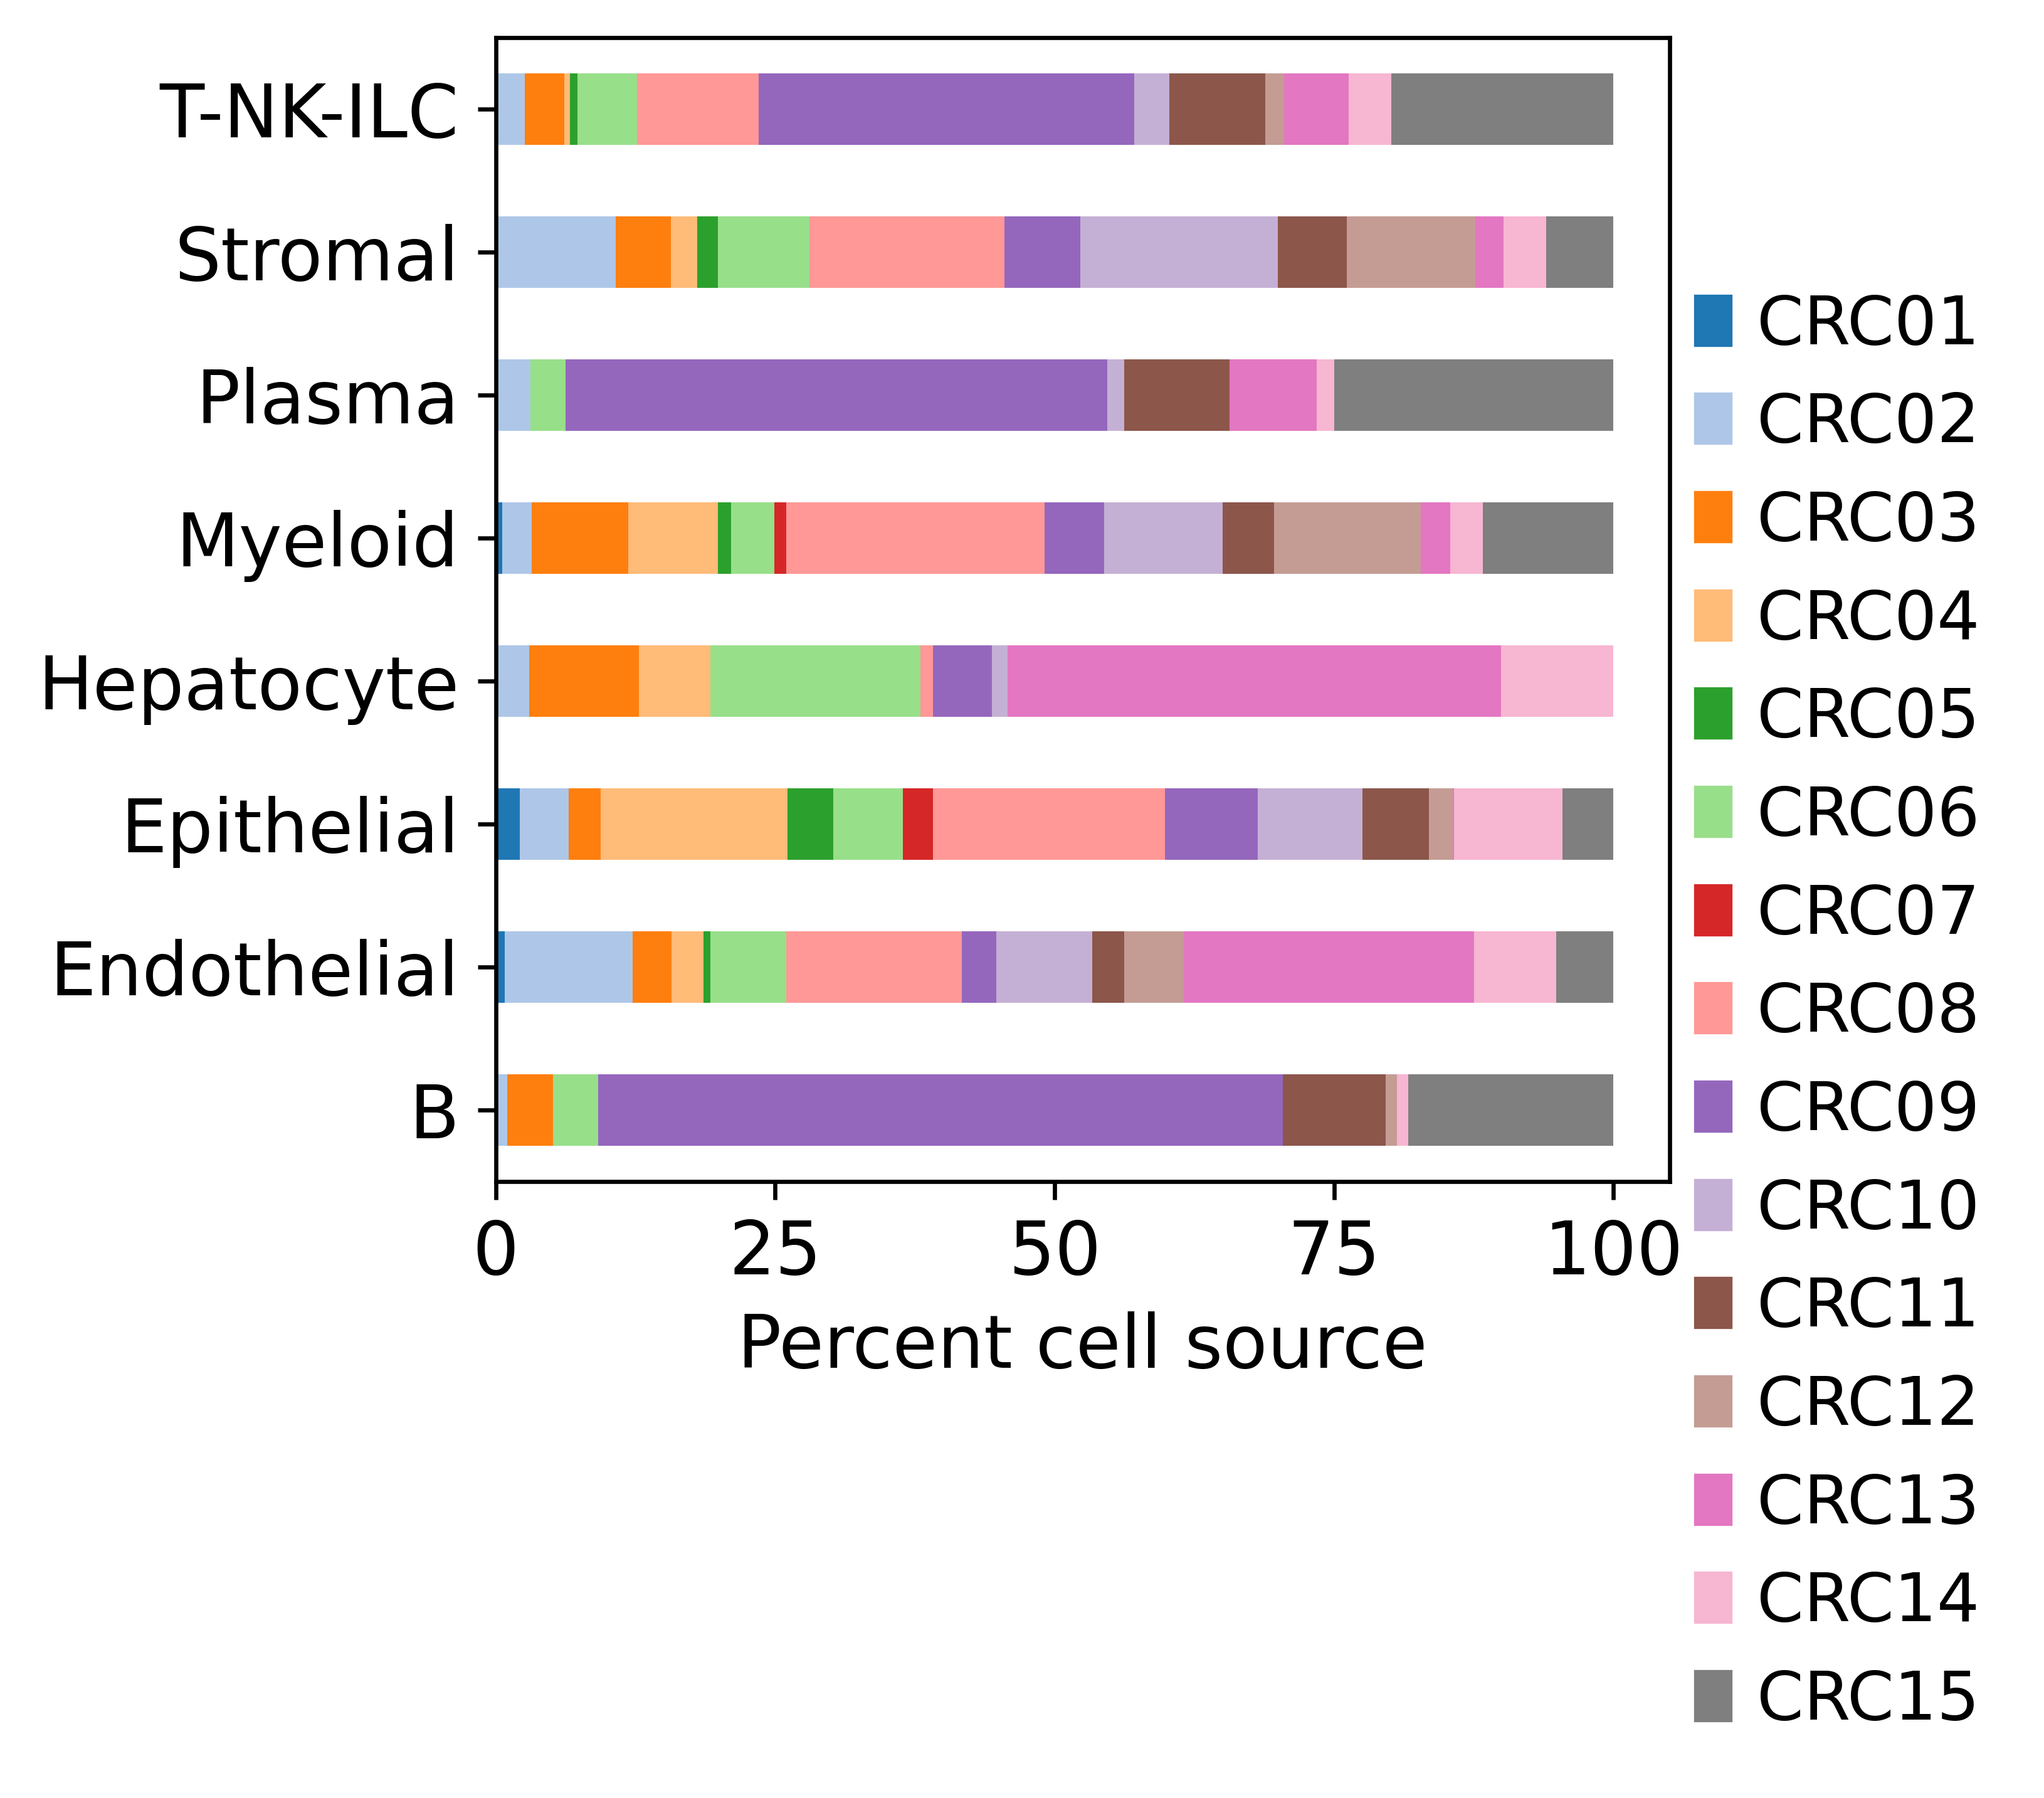

In [11]:
proportion_cells_patient(
    adata_multiome.obs,
    groupby_labels=["Annotation_scVI", "Patient"],
    xlabel="Percent cell source",
    ylabel="",
    colors=color_dict_subset,
    figname="Multiome_annotation_patient.pdf",
)

Annotation_scVI         B  Endothelial  Epithelial  Hepatocyte    Myeloid  \
Patient                                                                     
CRC01            0.000000     1.117318   95.530726    0.000000   3.072626   
CRC02            0.108108     6.054054   76.324324    1.405405   5.189189   
CRC03            0.529101     2.248677   59.788360    5.687831  20.899471   
CRC04            0.000000     0.484932   92.760651    0.969865   5.057153   
CRC05            0.000000     0.429185   93.562232    0.000000   3.147353   
CRC06            0.303721     2.505695   75.702354    6.226272   5.391040   
CRC07            0.000000     0.000000   95.824176    0.000000   4.175824   
CRC08            0.000000     1.880801   81.167562    0.122130  10.332193   
CRC09            2.843602     0.710900   62.701422    1.090047   4.597156   
CRC10            0.000000     2.223399   79.407094    0.317628  10.269984   
CRC11            0.729927     1.135442   77.210057    0.000000   6.812652   

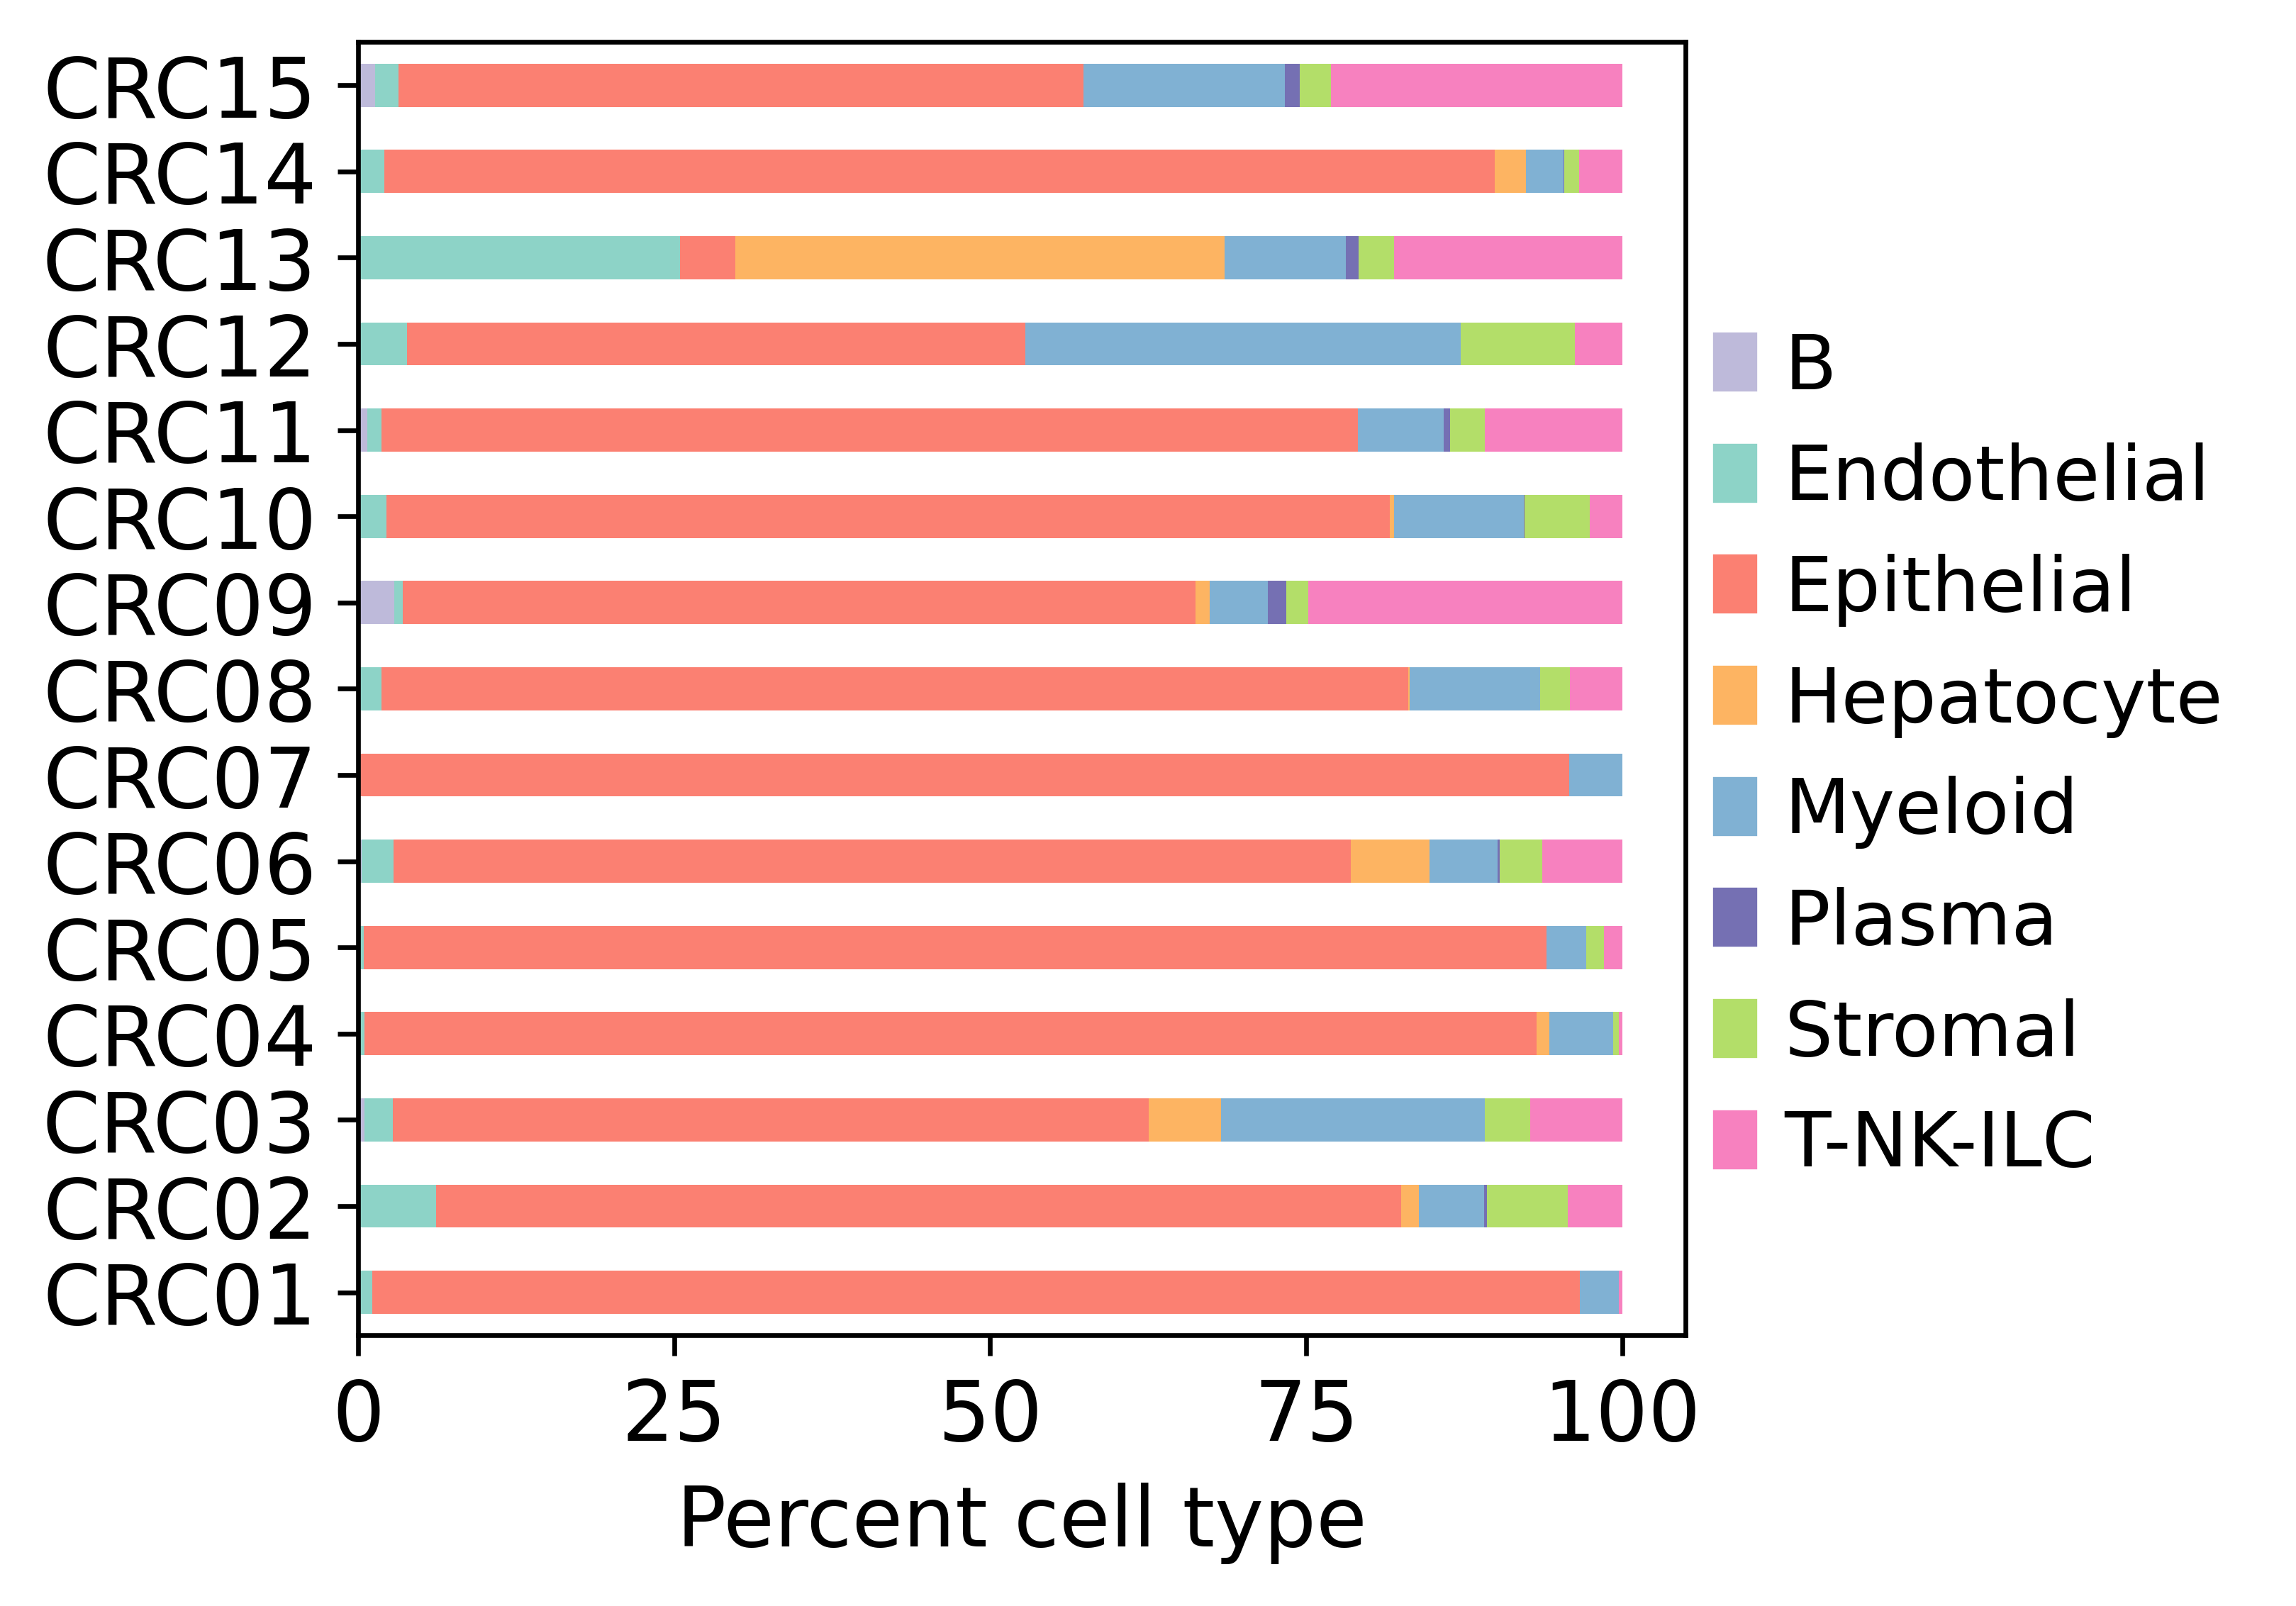

In [12]:
pal_dict_major_celltypes = {"B": "#BEBADA",
            "Endothelial": "#8DD3C7",
            "Epithelial": "#FB8072",#E41A1C #FB8072
            "Hepatocyte": "#FDB462",
            #"Mast": "#fccde5", #"#000000",
            "Myeloid": "#80B1D3",
            "Plasma": "#7570B3",#B3B3B3
            "Stromal": "#B3DE69",
            "T-NK-ILC": "#F781BF"
           }

proportion_cells_patient(
    adata_multiome.obs,
    groupby_labels=["Patient", "Annotation_scVI"],
    xlabel="Percent cell type",
    ylabel="",
    colors=pal_dict_major_celltypes,
    figname="Multiome_patient_which_annotations.pdf",
)

# We just look at TME

## Stromal

In [13]:
adata_stromal = adata_multiome[adata_multiome.obs.Annotation_scVI=="Stromal"].copy()
adata_stromal.obs.Annotation_scVI_detailed.cat.categories

Index(['C3 iCAF', 'ECM CAF', 'Myofibroblast', 'Pericyte', 'SMC'], dtype='object')

In [14]:
stromal_colours = dict(
    zip(adata_stromal.obs.Annotation_scVI_detailed.cat.categories.values.tolist(),
        ["#41ab5d", "#fe4fe1", "#4fe1fe", "#4f8afe", "#e1fe4f",]
       )
)

Annotation_scVI_detailed    C3 iCAF    ECM CAF  Myofibroblast   Pericyte  \
Patient                                                                    
CRC02                      3.389831  86.440678       3.389831   6.779661   
CRC03                      0.000000  70.370370      22.222222   0.000000   
CRC04                      0.000000  76.923077       7.692308   7.692308   
CRC05                     30.000000  20.000000      50.000000   0.000000   
CRC06                     13.333333  64.444444      15.555556   0.000000   
CRC08                      0.000000  75.000000      19.791667   0.000000   
CRC09                     40.540541  56.756757       0.000000   2.702703   
CRC10                      3.092784  59.793814      11.340206   6.185567   
CRC11                      0.000000  76.470588       8.823529  11.764706   
CRC12                      3.174603  63.492063      23.809524   7.936508   
CRC13                     42.857143  35.714286      14.285714   0.000000   
CRC14       

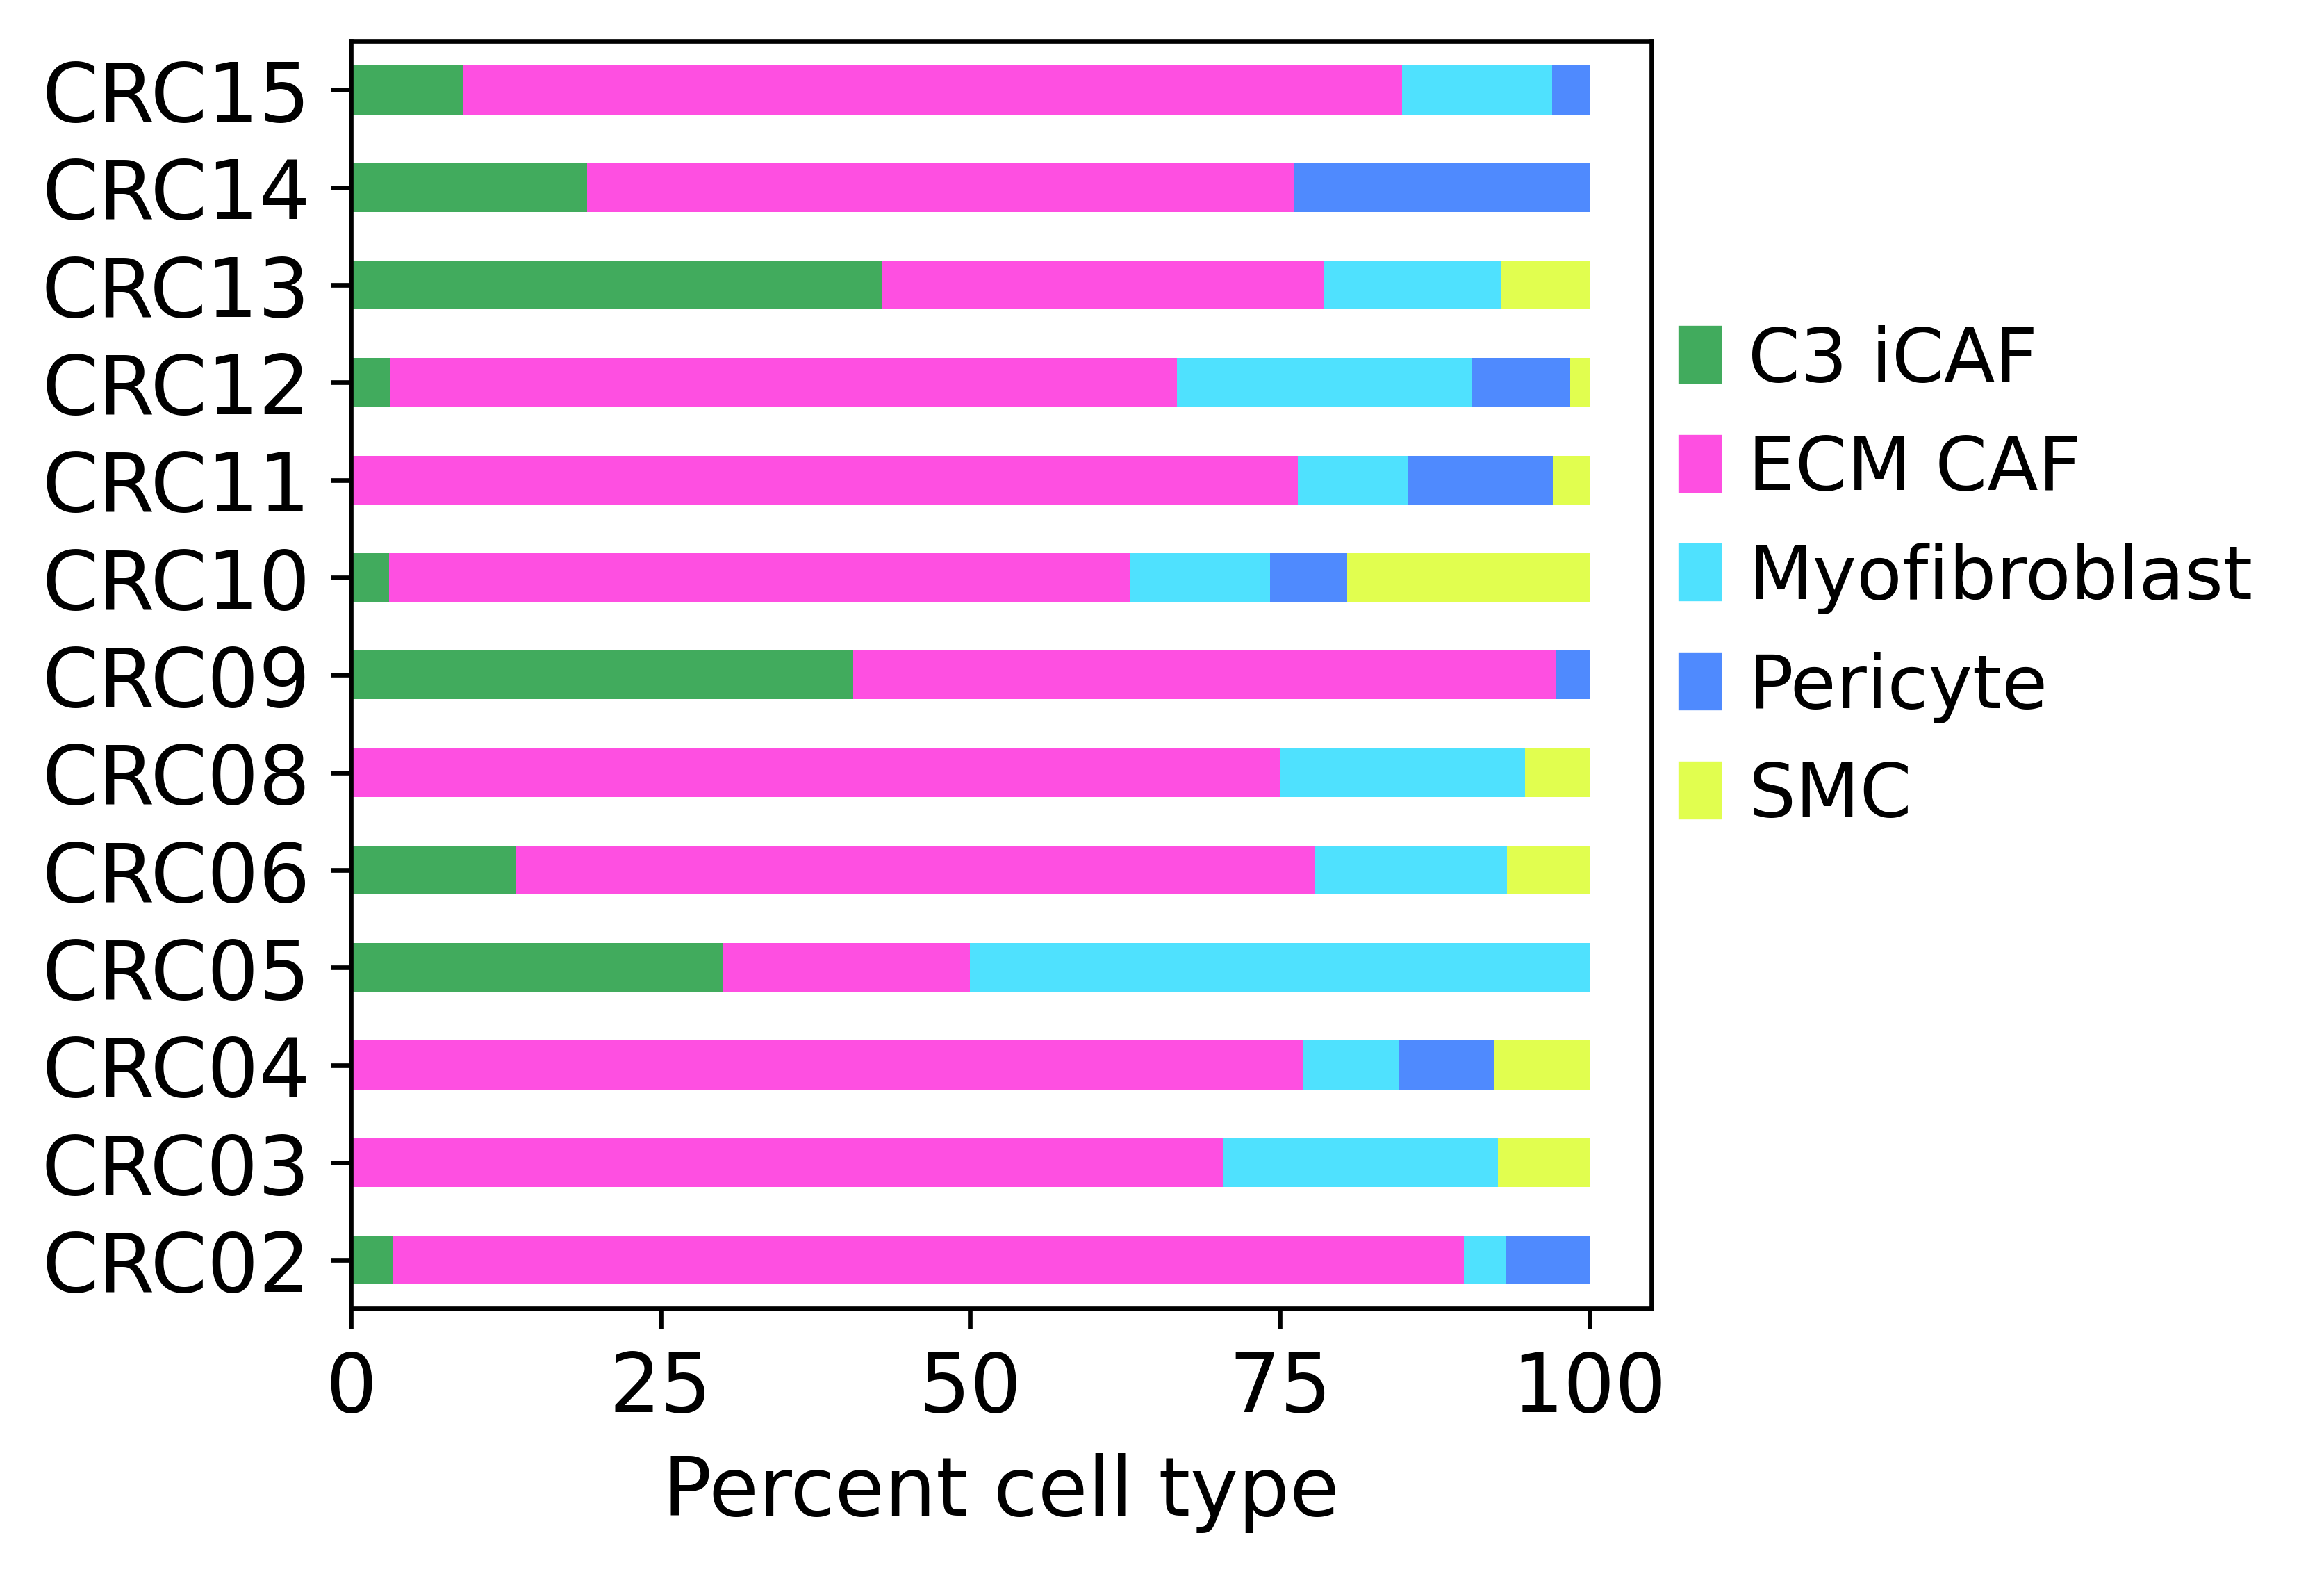

In [15]:
proportion_cells_patient(
    adata_stromal.obs,
    groupby_labels=["Patient", "Annotation_scVI_detailed"],
    xlabel="Percent cell type",
    ylabel="",
    colors=stromal_colours,
    figname="Multiome_stromal_patient_which_annotations.pdf",
)

## Myeloid

In [16]:
adata_myeloid = adata_multiome[adata_multiome.obs.Annotation_scVI=="Myeloid"].copy()
adata_myeloid.obs.Annotation_scVI_detailed.cat.categories

Index(['C1QC Mac', 'FCN1 Mono', 'HSP Mono', 'IL1B Mac', 'Kupffer',
       'Myeloid cycling', 'NLRP3 Mac', 'Neutrophil', 'PLTP LYVE1 Mac',
       'SPP1 Mac', 'cDC1', 'cDC2', 'migDC', 'pDC'],
      dtype='object')

In [17]:
myeloid_colors = dict(
    zip(adata_myeloid.obs.Annotation_scVI_detailed.cat.categories.values.tolist(),
        ["#80b1d3", "#b3de69", "#e31a1c", "#fb8072", "#e78ac3", "#ffff99", 
         "#fdb462", "#1f78b4", "#fccde5", "#8dd3c7", "#bc80bd", "#bebada", "#762a83", "#fa9fb5"]
       )
)

Annotation_scVI_detailed   C1QC Mac  FCN1 Mono  HSP Mono  IL1B Mac    Kupffer  \
Patient                                                                         
CRC01                      0.000000   0.000000  0.000000  0.000000   0.000000   
CRC02                     22.916667   2.083333  2.083333  4.166667   0.000000   
CRC03                      1.265823   0.632911  0.632911  0.000000   0.000000   
CRC04                      3.424658   0.000000  2.054795  2.054795   0.000000   
CRC05                      4.545455   0.000000  0.000000  0.000000   0.000000   
CRC06                      7.042254   0.000000  0.000000  2.816901   1.408451   
CRC07                      0.000000   0.000000  5.263158  0.000000   0.000000   
CRC08                     12.529551   0.000000  0.236407  2.127660   0.472813   
CRC09                     25.773196   0.000000  0.000000  5.154639   2.061856   
CRC10                      4.639175   0.515464  0.515464  2.061856   0.000000   
CRC11                     14

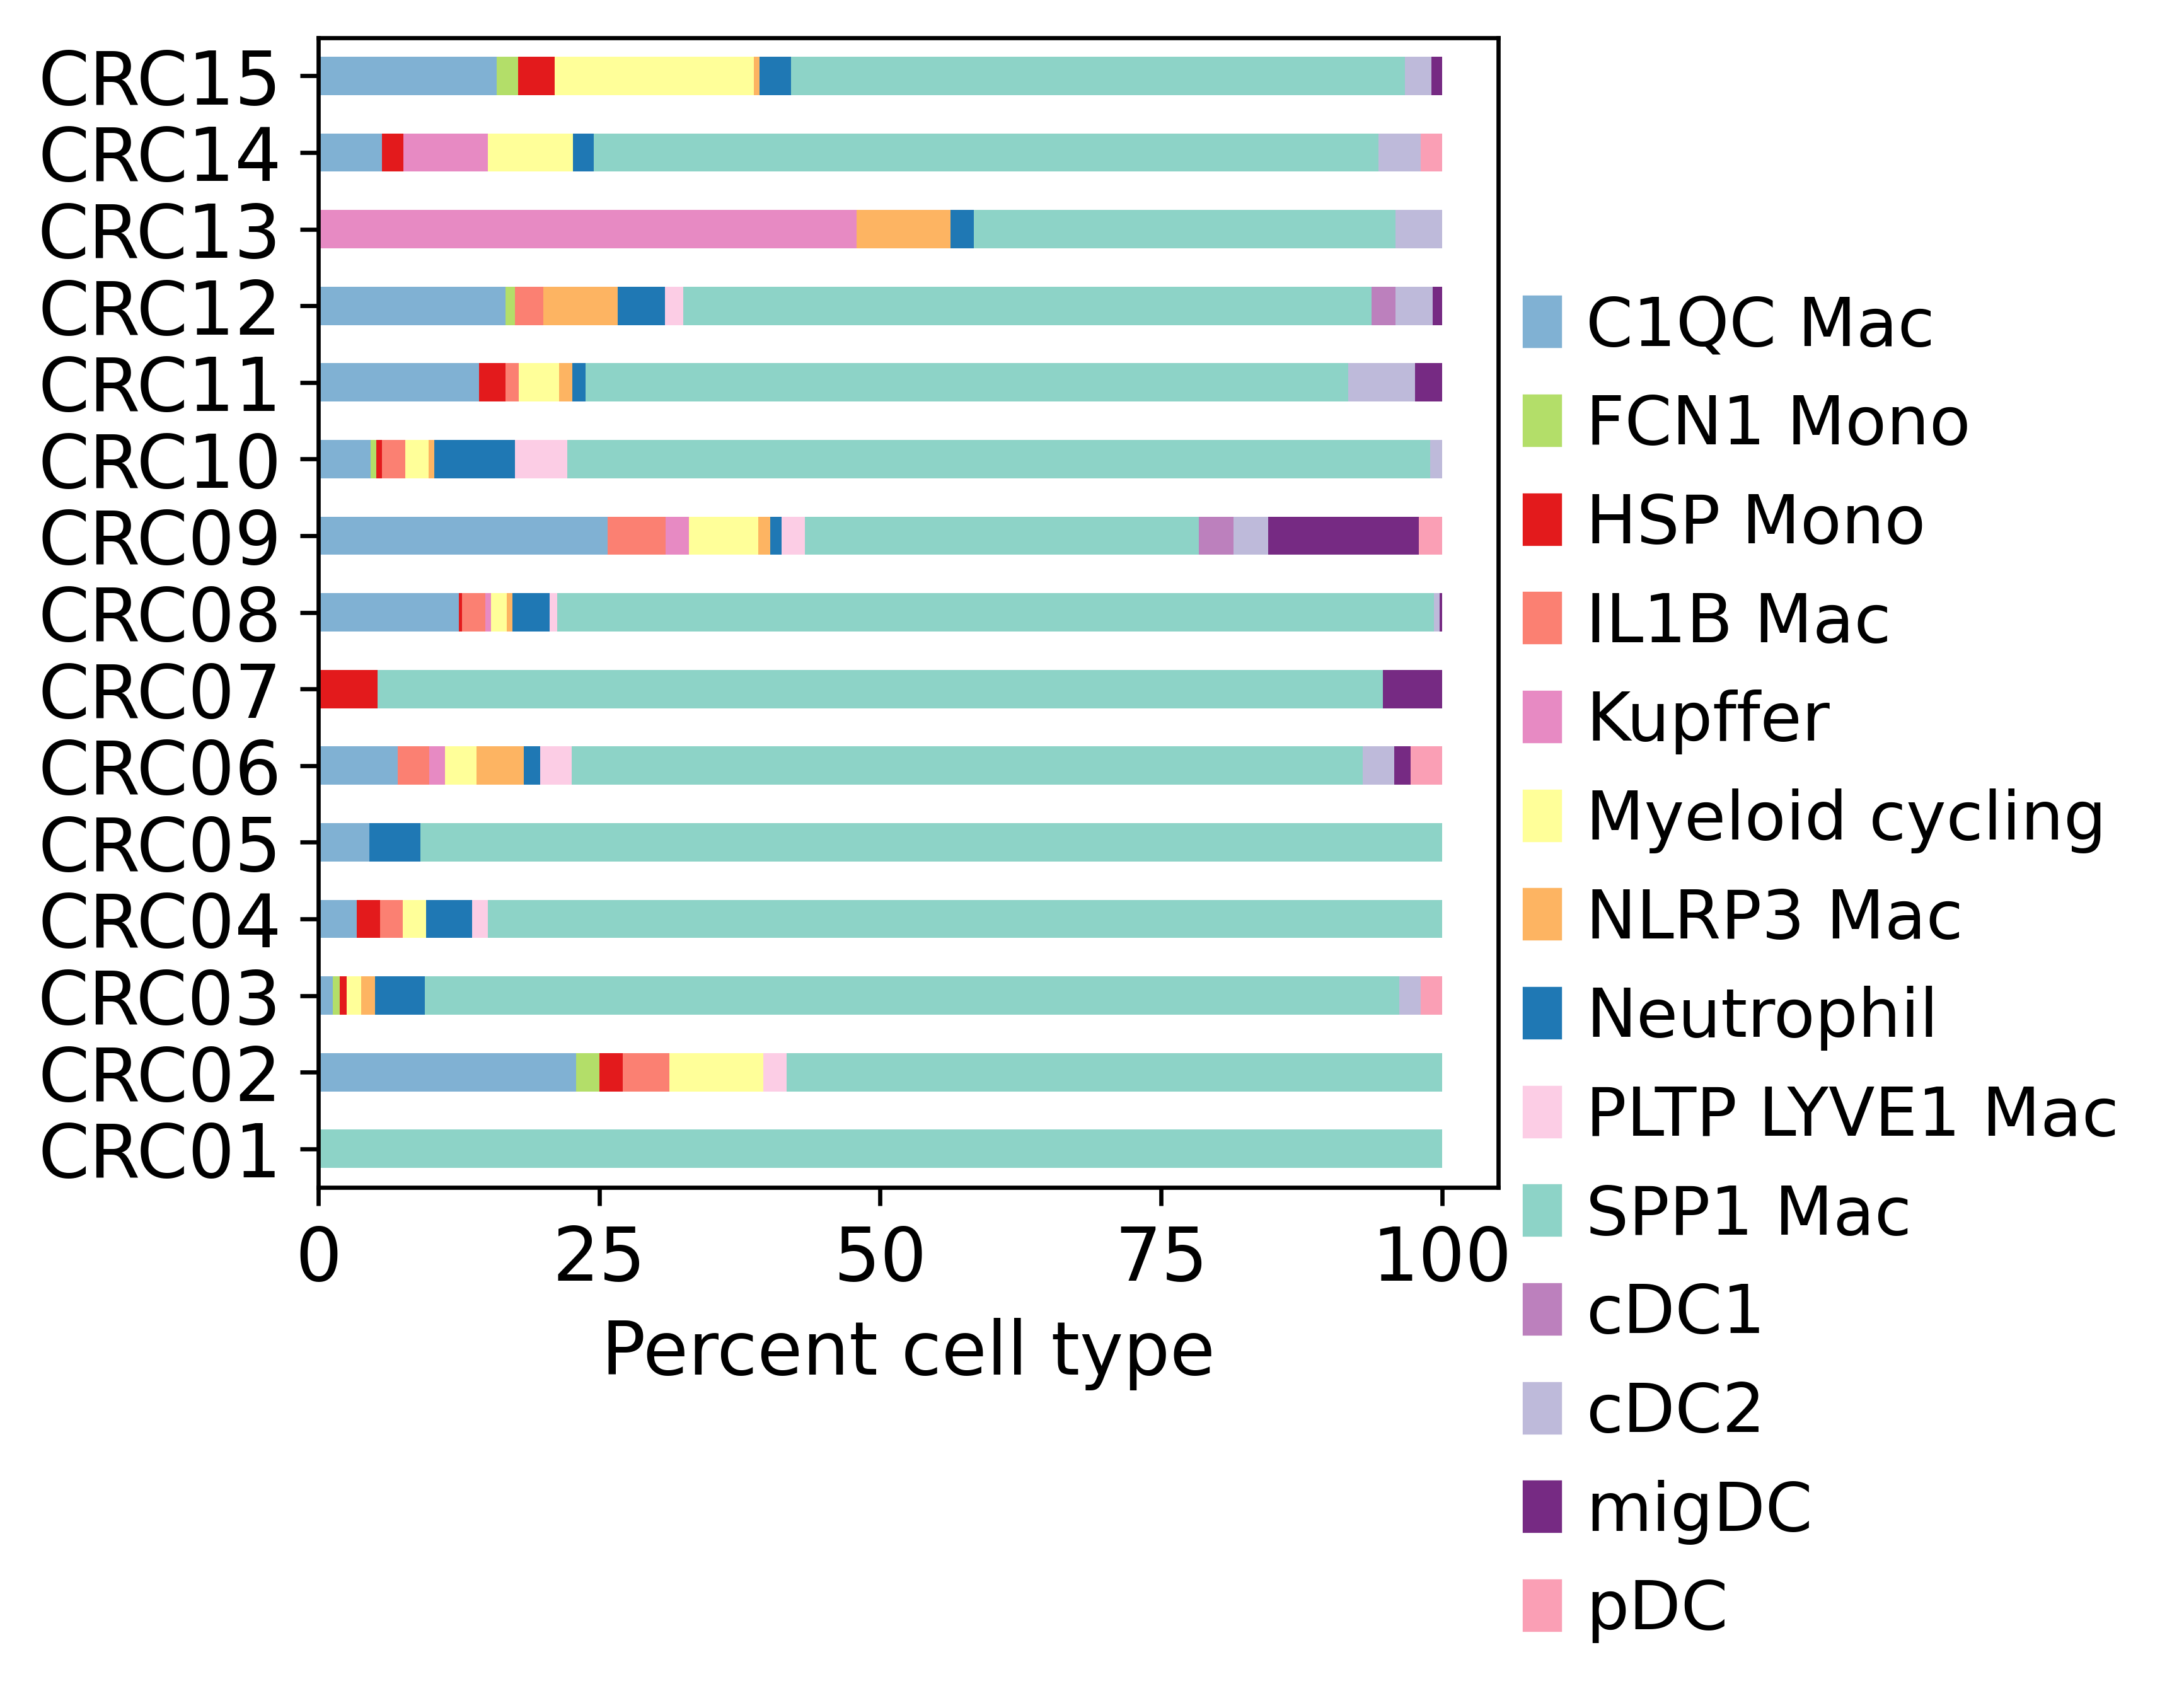

In [18]:
proportion_cells_patient(
    adata_myeloid.obs,
    groupby_labels=["Patient", "Annotation_scVI_detailed"],
    xlabel="Percent cell type",
    ylabel="",
    colors=myeloid_colors,
    figname="Multiome_myeloid_patient_which_annotations.pdf",
)

## T NK ILC

In [19]:
adata_t = adata_multiome[adata_multiome.obs.Annotation_scVI=="T-NK-ILC"].copy()
adata_t.obs.Annotation_scVI_detailed.cat.categories

Index(['CD4 Tfh', 'CD4 Th', 'CD4 Th HSP', 'CD4 Th17', 'CD4 Tn', 'CD8 Tem',
       'CD8 Tem GZMB', 'CD8 Tem HSP', 'CD8 Tex', 'MAIT', 'NK1', 'NK2', 'NKT',
       'T cycling', 'Treg', 'gdT'],
      dtype='object')

In [20]:
t_colors = dict(
    zip(adata_t.obs.Annotation_scVI_detailed.cat.categories.values.tolist(),
        ["#1f78b4", "#fa9fb5", "#beaed4", "#fdbf6f", "#b15928", "#e31a1c", 
         "#fc9272", "#800026", "#ff7f00", "#7fc97f", "#1d91c0", "#dd3497", "#a6cee3",
         "#ffff99", "#33a02c", "#6a3d9a"
        ]
    )
)

Annotation_scVI_detailed    CD4 Tfh     CD4 Th  CD4 Th HSP   CD4 Th17  \
Patient                                                                 
CRC01                      0.000000   0.000000    0.000000   0.000000   
CRC02                      2.500000  32.500000    0.000000   7.500000   
CRC03                      3.636364  30.909091    0.000000   1.818182   
CRC04                      0.000000  50.000000    0.000000   0.000000   
CRC05                     30.000000   0.000000    0.000000  20.000000   
CRC06                      3.614458  31.325301    0.000000   7.228916   
CRC08                      4.705882  41.764706    0.000000   1.176471   
CRC09                     12.404580  21.564885    0.000000   0.763359   
CRC10                      0.000000  32.653061    0.000000   4.081633   
CRC11                      3.731343  36.567164    0.000000   2.238806   
CRC12                      0.000000  19.230769    3.846154  11.538462   
CRC13                      1.111111  35.555556    0

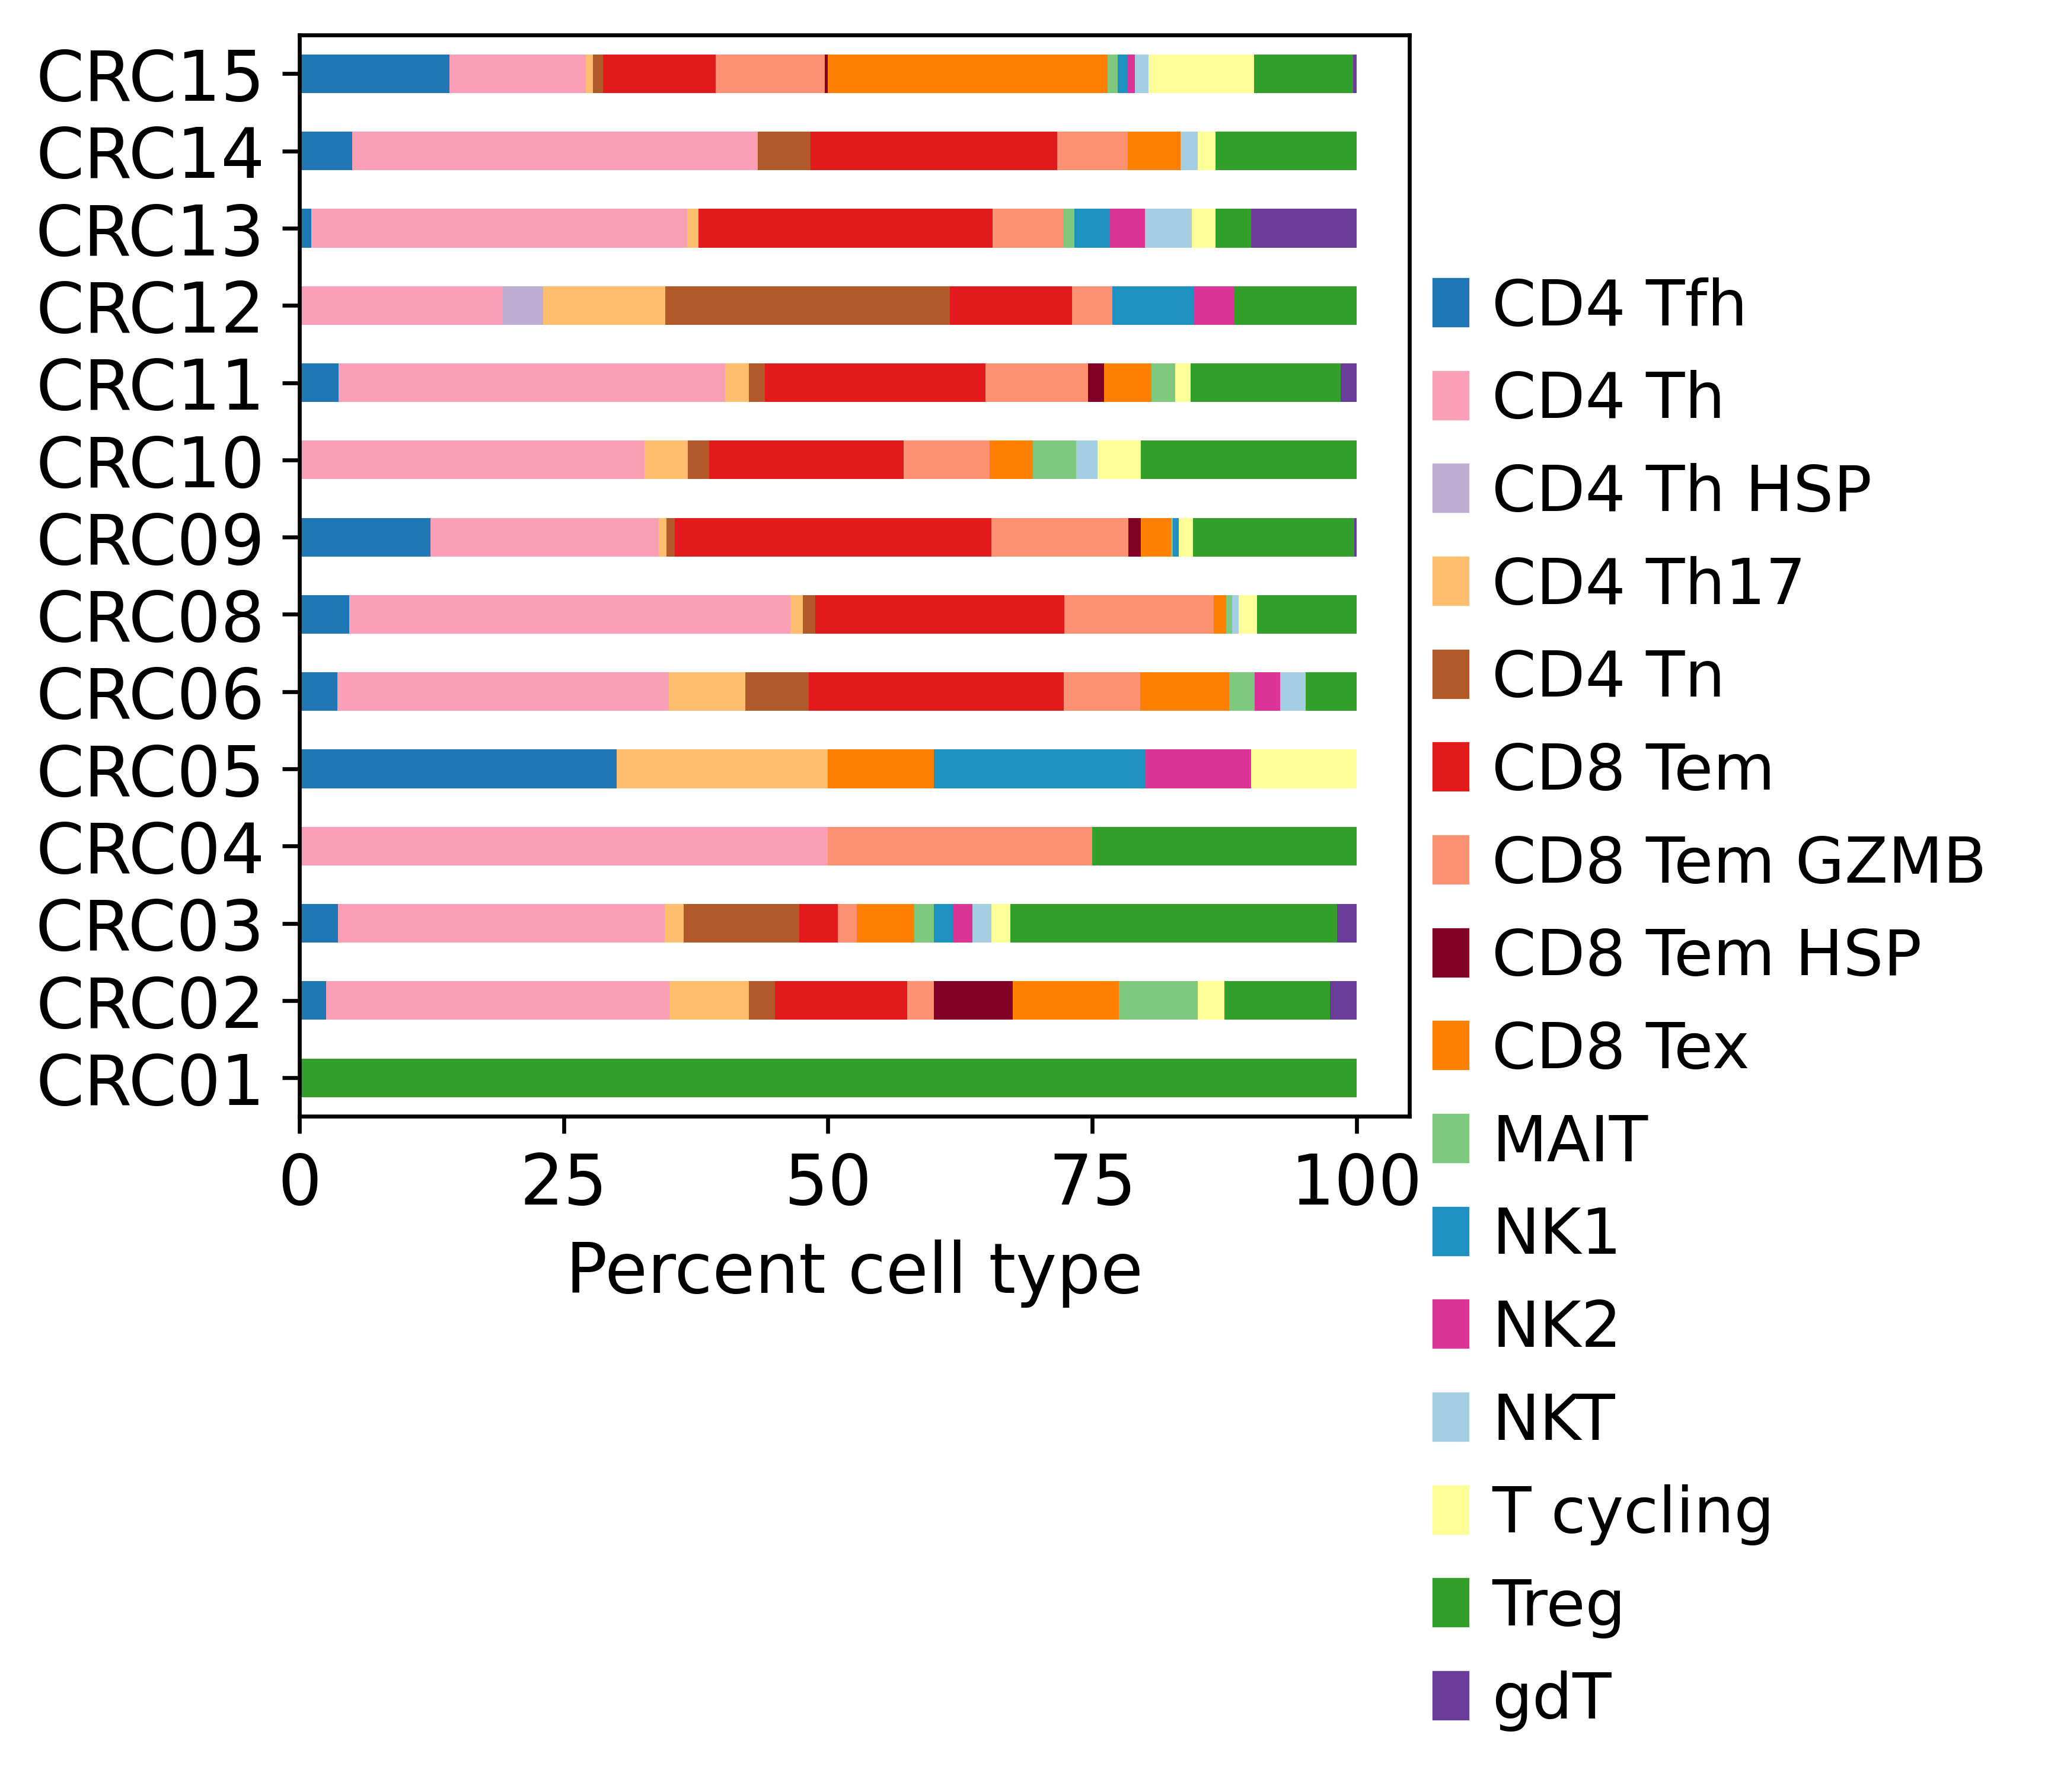

In [21]:
proportion_cells_patient(
    adata_t.obs,
    groupby_labels=["Patient", "Annotation_scVI_detailed"],
    xlabel="Percent cell type",
    ylabel="",
    colors=t_colors,
    figname="Multiome_tnkilc_patient_which_annotations.pdf",
)

In [22]:
adata_multiome.obs.Annotation_scVI_detailed.value_counts()

TA1                  4116
Hypoxia              2481
Stem (NOTUM high)    1933
Colonocyte           1913
Stem                 1400
Intermediate         1319
SPP1 Mac             1276
pEMT                  998
UPR                   759
ipEMT                 469
CD4 Th                409
ECM CAF               370
Hepatocyte            338
CD8 Tem               336
Goblet                323
Tip-like endo         241
C1QC Mac              200
Treg                  196
CD8 Tem GZMB          162
TA2                   162
CD4 Tfh               135
CD8 Tex               125
SEC                   113
Cholangiocyte          99
B                      98
Myofibroblast          75
Stalk-like endo        73
Myeloid cycling        72
Enteroendocrine        71
Tuft                   65
Plasma                 64
Neutrophil             63
Lymphatic endo         62
T cycling              51
C3 iCAF                44
cDC2                   34
CD4 Tn                 34
SMC                    33
IL1B Mac    